In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt 
import numpy as np
import streamlit as st

In [4]:
st.title("Investment Portfolio Dashboard/Yatırım Portföy Panosu")
assest=st.text_input("Provide you assets (comma-sepearated)/Varlıklarınızı sağlayın (virgülle ayrılmış)","AAPL,MSFT,GOOGL")
start=st.date_input("Pick a starting date for your analysis/Analiziniz için bir başlangıç ​​tarihi seçin",value=pd.to_datetime("2022-06-01"))
data=yf.download(assest,start=start)["Adj Close"]

[*********************100%***********************]  3 of 3 completed


In [4]:
data

,AAPL,GOOGL,MSFT
Date,,,
2022-06-01,147.827301,113.891998,269.811951
2022-06-02,150.312454,117.622498,271.951233
2022-06-03,144.517044,114.541000,267.434937
2022-06-06,145.272537,116.820503,266.177094
2022-06-07,147.827301,117.149498,269.891174
...,...,...,...
2023-05-26,175.429993,124.610001,332.890015
2023-05-30,177.300003,123.669998,331.209991
2023-05-31,177.250000,122.870003,328.390015


In [5]:
ret_df=data.pct_change()
cumul_ret=(ret_df+1).cumprod()-1
pf_cumul_ret=cumul_ret.mean(axis=1)

In [6]:
cumul_ret

,AAPL,GOOGL,MSFT
Date,,,
2022-06-01,NaN,NaN,NaN
2022-06-02,1.681119e-02,0.032755,0.007929
2022-06-03,-2.239273e-02,0.005698,-0.008810
2022-06-06,-1.728208e-02,0.025713,-0.013472
2022-06-07,-1.110223e-16,0.028602,0.000294
...,...,...,...
2023-05-26,1.867226e-01,0.094107,0.233785
2023-05-30,1.993725e-01,0.085853,0.227559
2023-05-31,1.990343e-01,0.078829,0.217107


In [7]:
pf_cumul_ret

Date
2022-06-01         NaN
2022-06-02    0.019165
2022-06-03   -0.008501
2022-06-06   -0.001680
2022-06-07    0.009632
                ...   
2023-05-26    0.171538
2023-05-30    0.170928
2023-05-31    0.164990
2023-06-01    0.179058
2023-06-02    0.187262
Length: 253, dtype: float64

In [9]:
benchmark=yf.download("^GSPC",start=start)["Adj Close"]
bench_ret=benchmark.pct_change()
bench_dev=(bench_ret+1).cumprod()-1

[*********************100%***********************]  1 of 1 completed


In [10]:
bench_dev

Date
2022-06-01         NaN
2022-06-02    0.018431
2022-06-03    0.001782
2022-06-06    0.004925
2022-06-07    0.014496
                ...   
2023-05-26    0.025412
2023-05-30    0.025429
2023-05-31    0.019165
2023-06-01    0.029208
2023-06-02    0.044167
Name: Adj Close, Length: 253, dtype: float64

In [11]:
W=(np.ones(len(ret_df.cov()))/len(ret_df.cov()))
pf_std=(W.dot(ret_df.cov()).dot(W))**(1/2)

In [12]:
ret_df.cov()

,AAPL,GOOGL,MSFT
AAPL,0.000388,0.000342,0.000308
GOOGL,0.000342,0.000563,0.000394
MSFT,0.000308,0.000394,0.000434


In [14]:
st.subheader("Portfolio vs Index Development/Portföy ve Endeks Geliştirme")
tog=pd.concat([bench_dev,pf_cumul_ret],axis=1)
tog.columns=["S&P500 Performance","Portfolio Performance/Portföy Performansı"]

In [15]:
tog

,S&P500 Performance,Portfolio Performance
Date,,
2022-06-01,NaN,NaN
2022-06-02,0.018431,0.019165
2022-06-03,0.001782,-0.008501
2022-06-06,0.004925,-0.001680
2022-06-07,0.014496,0.009632
...,...,...
2023-05-26,0.025412,0.171538
2023-05-30,0.025429,0.170928
2023-05-31,0.019165,0.164990


In [16]:
st.line_chart(data=tog)

DeltaGenerator()

In [17]:
st.subheader("Portfolio Risk/Portföy Riski:")
pf_std
st.subheader("Benchmark Risk/Kıyaslama Riski:")
bench_risk=bench_ret.std()
bench_risk

0.013205702768698018

DeltaGenerator()

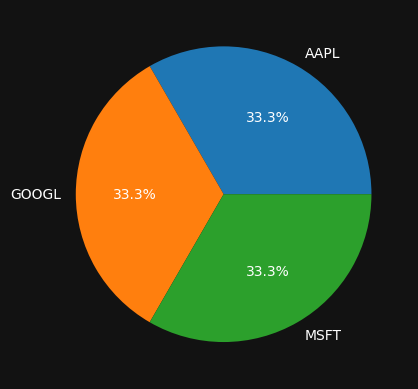

In [18]:
st.subheader("Portfolio composition/Portföy Kompozisyonu:")
fig, ax = plt.subplots (facecolor='#121212')
ax.pie (W, labels=data.columns, autopct='%1.1f%%', textprops={'color': 'white' })
st.pyplot (fig)